<a href="https://colab.research.google.com/github/hvandermarel/Colab-Notebooks/blob/main/CTB3310_A4_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CTB3310 Assignment 4 - GNSS Data Analysis (Google Colab version)

**Hans van der Marel, Delft, 5 Mar 2023**

In this assignment you will analyze the GNSS data that you collected with the help of the SW Maps app during the fieldwork outdoors. The data is stored in geopackage format which we are going to read and process in Python with the help of the GeoPandas package on-line using Google Colab.

## Google Colab requirements

The following files are required for this assignment

- this jupyter notebook (or a copy of it),
- RD/NAP grid correction files `nlgeo2018.gtx` and `rdcorr2018.gsb`, geopackage file with Benelux coast-lines and borders, and three example geopackage files, which will be downloaded from Github by this notebook,
- the geopackage file you created during the outdoor practical, which will be downloaded from Github by this notebook,
- answer sheet template (MS Word), available from Brightspace.

One important caveat to remember while using Colab is that the files won’t be available forever. **Colab is a temporary environment with an idle timeout of 90 minutes and an absolute timeout of 12 hours**. This means that the runtime will disconnect if it has remained idle for 90 minutes, or if it has been in use for 12 hours. On disconnection, you lose all your variables, states, installed packages, and files and will be connected to an entirely new and clean environment on reconnecting.

We therefore **strongly recommend** to **save your notebook regularly** to your Google drive 
> `File > Save a copy in Drive`    (first time)

> `File > Save`  

or download it to your local drive.

Only the notebook needs to be saved to Google drive. The other files are read only and can be downloaded from Github whenever necessary. 

## Download datasets and geopackage files

All the required files and datasets collected by the students are downloaded from Github. This must be done once every time a new clean session in Google Colab is started.

We start with downloading the RD/NAP grid correction files and example datasets.

In [1]:
!wget -O CTB3310_A4_Datasets.zip https://github.com/hvandermarel/Colab-Notebooks/blob/main/datasets/CTB3310_A4_Datasets.zip?raw=true
!unzip -o CTB3310_A4_Datasets.zip

--2023-03-05 10:15:55--  https://github.com/hvandermarel/Colab-Notebooks/blob/main/datasets/CTB3310_A4_Datasets.zip?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/hvandermarel/Colab-Notebooks/raw/main/datasets/CTB3310_A4_Datasets.zip [following]
--2023-03-05 10:15:55--  https://github.com/hvandermarel/Colab-Notebooks/raw/main/datasets/CTB3310_A4_Datasets.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hvandermarel/Colab-Notebooks/main/datasets/CTB3310_A4_Datasets.zip [following]
--2023-03-05 10:15:55--  https://raw.githubusercontent.com/hvandermarel/Colab-Notebooks/main/datasets/CTB3310_A4_Datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecti

After that the data collected during the practical is downloaded. This data is stored in three subdirectories, called `Monday20`, Wednesday22` and 'Thursday23`. 

In [2]:
!wget -O CTB3310_A4_GPKG.zip https://github.com/hvandermarel/Colab-Notebooks/blob/main/datasets/CTB3310_A4_GPKG.zip?raw=true
!unzip -o CTB3310_A4_GPKG.zip

--2023-03-05 10:15:57--  https://github.com/hvandermarel/Colab-Notebooks/blob/main/datasets/CTB3310_A4_GPKG.zip?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/hvandermarel/Colab-Notebooks/raw/main/datasets/CTB3310_A4_GPKG.zip [following]
--2023-03-05 10:15:57--  https://github.com/hvandermarel/Colab-Notebooks/raw/main/datasets/CTB3310_A4_GPKG.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hvandermarel/Colab-Notebooks/main/datasets/CTB3310_A4_GPKG.zip [following]
--2023-03-05 10:15:58--  https://raw.githubusercontent.com/hvandermarel/Colab-Notebooks/main/datasets/CTB3310_A4_GPKG.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuser

You can see all available files using the filebrowser in the navigation menu on the left (file icon), or using bash shell commands in any of the code cells, as is shown in the following example:

In [3]:
!pwd
!ls -l

/content
total 28924
-rw-r--r-- 1 root root 18890752 Mar  3 19:34 Benelux.gpkg
-rw-r--r-- 1 root root  7838131 Mar  5 10:15 CTB3310_A4_Datasets.zip
-rw-r--r-- 1 root root   550685 Mar  5 10:15 CTB3310_A4_GPKG.zip
drwxr-xr-x 2 root root     4096 Mar  5 10:15 Monday20
-rw-r--r-- 1 root root   579164 Mar 22  2019 nlgeo2018.gtx
-rw-r--r-- 1 root root    81920 Feb  3 11:27 PracticalTest1.gpkg
-rw-r--r-- 1 root root    61440 Feb 17 21:21 PracticalTest2.gpkg
-rw-r--r-- 1 root root   114688 Feb 20 17:18 PracticalTest3.gpkg
-rw-r--r-- 1 root root  1477616 Mar  5  2019 rdcorr2018.gsb
drwxr-xr-x 1 root root     4096 Mar  3 01:40 sample_data
drwxr-xr-x 2 root root     4096 Mar  5 10:15 Thursday23
drwxr-xr-x 2 root root     4096 Mar  5 10:15 Wednesday22


In [4]:
!ls -l Monday20

total 868
-rw-r--r-- 1 root root 65536 Feb 20 17:09 'MA10 GPKG.gpkg'
-rw-r--r-- 1 root root 65536 Feb 20 17:09 'MA11 GPKG.gpkg'
-rw-r--r-- 1 root root 73728 Feb 20 17:09 'ma12 GPKG.gpkg'
-rw-r--r-- 1 root root 77824 Feb 20 17:08 'MA13 GPKG.gpkg'
-rw-r--r-- 1 root root 81920 Feb 20 17:08 'MA15 GPKG.gpkg'
-rw-r--r-- 1 root root 73728 Feb 20 17:09 'ma1 GPKG.gpkg'
-rw-r--r-- 1 root root 81920 Feb 20 17:08 'Ma20a GPKG.gpkg'
-rw-r--r-- 1 root root 61440 Feb 20 17:08 'MA 21 GPKG.gpkg'
-rw-r--r-- 1 root root 77824 Feb 20 17:09 '[MA2] GPKG.gpkg'
-rw-r--r-- 1 root root 73728 Feb 20 18:56 'MA3 GPKG.gpkg'
-rw-r--r-- 1 root root 81920 Feb 20 17:09 'MA4 GPKG.gpkg'
-rw-r--r-- 1 root root 73728 Feb 20 17:09 'MA8 GPKG.gpkg'


## Link Google drive (optional)

It is easy to link a Colab session to your Google drive. This is not necessary for this notebook as all the required files are read-only. However, whenever you create or modify files, it is best to do this on your Google drive (otherwise they will disappear after time) 

To mount the drive uncomment the code below

In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive/', force_remount=True)

## Install GeoPandas

GeoPandas is written in pure Python, but has several dependencies written in C (GEOS, GDAL, PROJ).

Geopandas, and several dependencies, are not installed by default in Google Colab. So, this has to be done everytime a new clean session is started in Colab. Installion is done with `pip`.

In [6]:
!pip install geopandas mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import packages

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by `pandas` to allow spatial operations on geometric types. Geometric operations are performed by `shapely`. Geopandas further depends on `fiona` for file access, `pyproj` for coordinate transformations, `matplotlib` for plotting and a number of other packages.

For much of the work a simple import of `geopandas` is sufficient. The other packages do the work under the hood. However, sometimes, for more advanced work, it is necessary to import other packages in order to get access to more functionality form their native API's. Furthermore, for computational work rely on `numpy`.

In [7]:
import geopandas
import fiona
import pyproj

import numpy as np
import matplotlib.pyplot as plt

## Read geopackage file

The GNSS data is stored in a standard GIS format: geopackage. A geopackage contains multiple layers. If you used the SW Maps template provided by us, the layers are: *points*, *curves* and *Tracks*. Each layer is read into a *GeoDataFrame* object

In [8]:
path_to_data = "PracticalTest2.gpkg"

In [9]:
points = geopandas.read_file(path_to_data, layer='points')
lines = geopandas.read_file(path_to_data, layer='curves')
tracks = geopandas.read_file(path_to_data, layer='Tracks')

The above commands assume that you stored the data in three layers named *points*, *curves* and *Tracks*; these are stored in *GeoDataFrame* objects with the names *points*, *lines* and *tracks* (Note: SW Maps uses *Tracks* as default layer name, however, we call the object *tracks*, without capitals, which is more Pythonic). If one layer is missing, or if you used different names for the layers, this will result in an error.

To find out the names of the layers in the geopackage file we use `fiona`. If you find you have used different names, adjust the above commands accordingly.

In [10]:
layers = fiona.listlayers(path_to_data)
layers

['curves', 'points', 'Tracks', 'android_metadata']

To display the contents of the layers you can use print(object_name) or just type the object name (as last code line), e.g.:

In [11]:
points

,UUID,FID,_description,latitude,longitude,elevation,ortho_ht,time,fix_id,name,control_point,remarks,geometry
0,f3df39c0-e7aa-4124-9153-bc6a1f3f2e4a,1,,51.997117,4.375868,43.16642,0.0,13-02-2023 13:18:29.000 CET,4,a1,yes,,POINT Z (4.37587 51.99712 43.16642)
1,d5d504c2-324b-41f0-8278-bb0ff06cec46,2,,51.997075,4.375872,43.17842,0.0,13-02-2023 13:19:18.000 CET,4,a2,yes,,POINT Z (4.37587 51.99708 43.17842)


In [12]:
lines

,UUID,FID,_description,_length,type,alignment,remarks,geometry
0,867bd8a8-578f-462f-a1e5-ac3644c6bc39,3,,30.440912,road,border,,"LINESTRING Z (4.37608 51.99747 42.66542, 4.376..."
1,99b3b2eb-f81a-4745-849f-368afb296b2b,4,,25.339667,road,border,,"LINESTRING Z (4.37598 51.99731 42.81142, 4.375..."
2,af83b7ba-f2be-44d7-9f5f-d373ddee2d8b,5,,28.924731,pedestrian,border,,"LINESTRING Z (4.37587 51.99713 43.11042, 4.375..."
3,fdab2c37-7add-4902-abf3-b3036873a6ce,6,,24.601319,road,border,,"LINESTRING Z (4.37589 51.99710 42.79242, 4.375..."


In [13]:
tracks

,UUID,remarks,start_time,end_time,geometry
0,b7862745-0e9c-4a42-b742-8b3c19257840,,13-02-2023 13:21:33.000 CET,13-02-2023 13:22:34.000 CET,"LINESTRING Z (4.37603 51.99741 42.54842, 4.376..."
1,69c779cf-3642-4545-88a7-73e17804cd13,,13-02-2023 13:32:41.000 CET,13-02-2023 13:36:29.000 CET,"LINESTRING Z (4.37589 51.99724 43.04542, 4.375..."


Each layer consists of an index, feature data and **geometry**. The geometry is in Well-Known-Text (WKT) format. In our dataset two fundamental geometries are used in their three dimensional variant: **point** and **linestring**. The WKT representation is
```
POINT Z(<lon> <lat> <hgt>)
LINESTRING Z(<lon> <lat> <hgt>, <lon> <lat> ... )
```
The **linestring** consists of a sequence of  coordinate tuples, the **point** has exactly one. The three dimensional coordinate **tuples** `(<lon> <lat> <hgt>)` provide the geographic **longitude** &lambda; and **latitude** &phi; in *degrees*, and **elevation** *h* above the ellipsoid in *meters*.
The other columns contain the attributes that where stored with the data when it was collected, such as the name and type of the feature that you entered when collecting the data, while others, such as the fix_id (4 is RTK fixed) provided by the software.

The `android_meatadata` layer does not contain much useful information.

## Mapping and Plotting

GeoPandas provides a high-level interface to the `matplotlib` library for making maps. Mapping shapes is as easy as using the `plot()` method on a GeoSeries or GeoDataFrame. 

<AxesSubplot:>

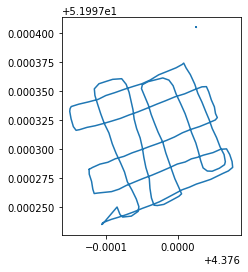

In [14]:
tracks.plot()

For making a map with multiple layers, first remember to always ensure they share a common Coordinate Reference System (CRS), so they will align. In our dataset this is (still) the case as the layers come from the same source. To create a map with multiple layers we call the plot method on individual layers with options. 

Note that in general, any options one can pass to pyplot in matplotlib (or style options that work for lines) can be passed to the plot() method.

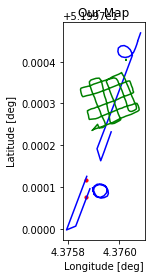

In [15]:
base = lines.plot(color='blue')
points.plot(ax=base, marker='o', color='red', markersize=10)
tracks.plot(ax=base, color='green')
base.set(xlabel='Longitude [deg]', ylabel='Latitude [deg]', title='Our Map');

**Question 1:** Include this plot/map in your report.

When using the *GeoPandas* plot() method the aspect ratio is set automatically to equal (note that this is not done when working with pyplot directly). It is smart: it even takes into account the fact that - except at the equator - one degree in latitude is not the same distance as one degree in longitude! 

**Question 2:** Explain why this phenomena occurs, measure the ratio between latitude and longitude in the plot and compute the ratio from the formulas in the book (29.7) on Northing and Easting, section 29.2.2, and compare.  

**Answer** Towards the pole the meridians are converging with the result that, except at the equator, one degree in longitude represents a shorter metric distance than one degree in latitude.  The approximate ratio is $$ \frac{ distance(deg\ latitude) }{ distance(deg\ longitude)} = 1 / \cos(latitude) $$ 


In [16]:
ratio_computed = 1 / np.cos(np.deg2rad(52))
ratio_measured_in_map = 20 / 12            # mm for 0.0001 deg in latitude resp. longitude
print('ratio computed:', ratio_computed, ', measured in map:', ratio_measured_in_map )

ratio computed: 1.624269245482744 , measured in map: 1.6666666666666667


To illustrate this point we redo the map, using a slightly different method to plot multiple layers using `pyplot` (for fun), and set the **aspect ratio** to **one**.

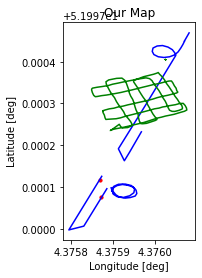

In [17]:
fig, ax = plt.subplots()

lines.plot(ax=ax, color='blue')
points.plot(ax=ax, marker='o', color='red', markersize=10)
tracks.plot(ax=ax, color='green')
ax.set(xlabel='Longitude [deg]', ylabel='Latitude [deg]', title='Our Map')

ax.set_aspect(1)

plt.show();

Clearly, this is not the way latitude and longitude data should be plotted (you are warned!). When you plot latitude and longitude data always set the aspect ratio accordingly.

Try this yourself by adjusting the aspect ratio in the previous code. You do not have to give the plot in your report **[HM: could be turned into question]**.

However, if you want to do geometric computations, such as computing areas, it is a much better idea to use a map projection, as we will explore later.

## Interactive mapping

GeoPandas can also create interactive maps based on the `folium` library (under the hood in geopandas). Creating maps for interactive exploration uses the `explore()` method of a GeoSeries or GeoDataFrame.

The `explore()` method returns a `folium.Map` object, which can also be passed directly (as you did with ax in plot()). In the example below, we plot our three layers on the same map by passing the folium.Map object to subsequent layers (using *m* instead of *ax* keywords). 

After importing folium you can also use folium functionality directly on the resulting map, e.g. adding additional tiles allowing you to change the background directly in the map. We leave this to you to experiment (after consulting geopandas and folium documentation).

In [18]:
fm = lines.explore(color='blue')
points.explore(m=fm, color='red')
tracks.explore(m=fm, color='green')

Hovering over a feature shows a popup with all the feature attributes. 

Note that the GeoDataFrame needs to have a Coordinate Reference System (CRS) set to display the background tiles! (and get the aspect ratio correct as with the static matplotlib plots).

> ### A note on interactive mapping (QGIS promotion, for your information)
>
> Interactive mapping may seem a nice and useful feature of GeoPandas. However for true interactive mapping we recommend using a GIS system, such as ArcGIS or the freely available **QGIS** that will be used in assignment 5 and 6. 
> To obtain more or less the same result in QGIS: 
> 1. open a new QGIS project, 
> 2. double click `browser > XYZ Tiles > OpenStreetMap`, 
> 3. add your geopackage file using `Layer > Add Layer > Add Vector Layer` .
>
> Do not forget to set your project CRS to e.g. EPSG:28992 (otherwise you have this very unprofessional distorted latitude/longitude reference system.   

## Coordinate Reference System (CRS)

A GeoDataFrame needs to have a Coordinate Reference System (CRS) set to perform spatial analyses and enable coordinate transformations.

To obtain information on the CRS use the `.crs` attribute on a GeoDataFrame or GeoSeries.

In [19]:
lines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
print(lines.crs)

EPSG:4326


An important element is the EPSG code. Each geodetic datum, spatial reference system, Earth ellipsoid, coordinate transformation and related units of measurements is assigned an EPSG code between 1024 and 32767, that corresponds to a public registry in the EPSG Geodetic Parameter Dataset, originated by a member of the European Petroleum Survey Group (EPSG) in 1985, and maintained by the IOGP Geomatics Committee, see also Section 31.4 in the book.

Common EPSG codes are

* EPSG:4326 - WGS 84, latitude/longitude coordinate system based on the Earth's center of mass, used by the Global Positioning System among others.
* EPSG:3857 - Web Mercator projection used for display by many web-based mapping tools, including Google Maps and OpenStreetMap.
* EPSG:7789 - International Terrestrial Reference Frame 2014 (ITRF2014), an Earth-fixed system that is independent of continental drift.
* EPSG:4258 - European Terrestrial Reference Frame 1989 (ETRS89), an Earth-Fixed system moving along with the Eurasian Plate, defined only for the European continent.
* EPSG:28992 - Projected coordinate system for Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.

These systems are covered later in class and in part V of the book.

Our data is apparently in WGS84, but as we will find out later, this is not entirely correct (to be precise: it is the national realization of ETRS89). Coordinates are given as longitude &lambda;, latitude &phi; and elevation (height) *h* above the ellipsoid, cf. Figure 29.2 of the book.

Another way to describe the CRS that is used is by the standard machine-readable well-known text (WKT) representation, or a *proj4* string used by the legacy `proj4` library.  These CRS representations can be accessed using the *to_wrt()* or *to_proj4()* methods. 

In [21]:
print(lines.crs.to_wkt(pretty=True))

GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["Horizontal component of 3D system."],
        AREA["World."],
      

In [22]:
print(lines.crs.to_proj4())

+proj=longlat +datum=WGS84 +no_defs +type=crs


/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:1296: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


As you will notice, the legacy *to_proj4()* method produces a warning, informing that you might loose some information when using this representation.

## Coordinate Reference System (CRS) transformations with GeoPandas

Coordinate Reference System (CRS) transformations with GeoPandas is made ''easy'' using the `pyproj` package, the Python interface to **PROJ** (cartographic projections and coordinate transformations library), under the hood.

> PROJ is a generic coordinate transformation software written in C that transforms geospatial coordinates from one coordinate reference system (CRS) to another. This includes cartographic projections as well as geodetic transformations, cf. Figure 31.1 of the book. PROJ includes an API as well as command line applications. PROJ started purely as a cartography application letting users convert geodetic coordinates into projected coordinates using a number of different cartographic projections. Over the years, as the need has become apparent, support for datum shifts has slowly worked its way into PROJ as well. Today PROJ supports more than a hundred different map projections and can transform coordinates between datums using all but the most obscure geodetic techniques. PROJ has become the de-facto standard for coordinate transformations all around the World. See also Section 31.5 of the book.

GeoPandas provides a high-level interface to PROJ using the `to_crs()` method on a GeoSeries or GeoDataFrame. 

The next examples show how to transform our GeoDataFrames to the Dutch projected coordinate system, called RD (RijksDriehoeksmeting), cf. Figure 35.2: 

In [23]:
points_rd = points.to_crs("EPSG:28992")
lines_rd = lines.to_crs("EPSG:28992")
tracks_rd = tracks.to_crs("EPSG:28992")

In [24]:
lines_rd.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [25]:
points_rd

,UUID,FID,_description,latitude,longitude,elevation,ortho_ht,time,fix_id,name,control_point,remarks,geometry
0,f3df39c0-e7aa-4124-9153-bc6a1f3f2e4a,1,,51.997117,4.375868,43.16642,0.0,13-02-2023 13:18:29.000 CET,4,a1,yes,,POINT Z (85546.727 445898.267 43.166)
1,d5d504c2-324b-41f0-8278-bb0ff06cec46,2,,51.997075,4.375872,43.17842,0.0,13-02-2023 13:19:18.000 CET,4,a2,yes,,POINT Z (85546.876 445893.669 43.178)


In [26]:
lines_rd

,UUID,FID,_description,_length,type,alignment,remarks,geometry
0,867bd8a8-578f-462f-a1e5-ac3644c6bc39,3,,30.440912,road,border,,"LINESTRING Z (85562.008 445937.457 42.665, 855..."
1,99b3b2eb-f81a-4745-849f-368afb296b2b,4,,25.339667,road,border,,"LINESTRING Z (85554.954 445919.233 42.811, 855..."
2,af83b7ba-f2be-44d7-9f5f-d373ddee2d8b,5,,28.924731,pedestrian,border,,"LINESTRING Z (85547.111 445899.445 43.110, 855..."
3,fdab2c37-7add-4902-abf3-b3036873a6ce,6,,24.601319,road,border,,"LINESTRING Z (85548.511 445896.376 42.792, 855..."


As you can observe from the GeoDataFrames the *geometry* has changed, but not the other attributes! (the point GeoDataFrame still has attributes latitude and longitude from the original). 
Also note the transformation **DID NOT change the elevation** (the third coordinate). The height coordinate is still given as elevation above the original ellipsoid!

Below the data is plotted in the new CRS:

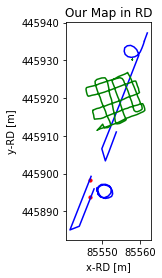

In [27]:
base = lines_rd.plot(color='blue')
points_rd.plot(ax=base, marker='o', color='red', markersize=10)
tracks_rd.plot(ax=base, color='green')
base.set(xlabel='x-RD [m]', ylabel='y-RD [m]', title='Our Map in RD');

**Question 3: Include this map in RD in your report.**

The aspect ratio is now  for both axis equal (as we would expect from projected coordinates).

> The coordinate transformation from EPSG:4326 (WGS-84) to EPSG:28992 has only an accuracy of about 1 meter. See also https://epsg.io/28992-to-4326 . This is mainly for two reasons: we actually have geographic coordinates in ETRS89 instead of WGS-84 and because a correction grid for RD was not used. Later we will show how to do a more accurate transformation, and why this is important.

We will also discuss later how to convert the elevation above the ellipsoid into the Amsterdam Ordance datum, in Dutch, Normaal Amsterdam Peil (NAP). This is important because there is a difference of about 42 meters between the elevation above the ellipsoid and NAP heights, cf. Figure 35.10 (hey, you didn't believe we were 40 meters above sea-level in Delft, really?).

## Data selections with GeoPandas (and Pandas)

GeoDataFrames are an extension of Panda's dataframes. This means you can select rows using the `loc[]`, `iloc[]` and `query()` methods. This is best ilustrated with examples:

In [28]:
lines.iloc[[0]]

,UUID,FID,_description,_length,type,alignment,remarks,geometry
0,867bd8a8-578f-462f-a1e5-ac3644c6bc39,3,,30.440912,road,border,,"LINESTRING Z (4.37608 51.99747 42.66542, 4.376..."


In [29]:
lines.iloc[[0,1]]

,UUID,FID,_description,_length,type,alignment,remarks,geometry
0,867bd8a8-578f-462f-a1e5-ac3644c6bc39,3,,30.440912,road,border,,"LINESTRING Z (4.37608 51.99747 42.66542, 4.376..."
1,99b3b2eb-f81a-4745-849f-368afb296b2b,4,,25.339667,road,border,,"LINESTRING Z (4.37598 51.99731 42.81142, 4.375..."


In [30]:
lines.loc[[0,1]]

,UUID,FID,_description,_length,type,alignment,remarks,geometry
0,867bd8a8-578f-462f-a1e5-ac3644c6bc39,3,,30.440912,road,border,,"LINESTRING Z (4.37608 51.99747 42.66542, 4.376..."
1,99b3b2eb-f81a-4745-849f-368afb296b2b,4,,25.339667,road,border,,"LINESTRING Z (4.37598 51.99731 42.81142, 4.375..."


In [31]:
lines.query( "type == 'road'" )

,UUID,FID,_description,_length,type,alignment,remarks,geometry
0,867bd8a8-578f-462f-a1e5-ac3644c6bc39,3,,30.440912,road,border,,"LINESTRING Z (4.37608 51.99747 42.66542, 4.376..."
1,99b3b2eb-f81a-4745-849f-368afb296b2b,4,,25.339667,road,border,,"LINESTRING Z (4.37598 51.99731 42.81142, 4.375..."
3,fdab2c37-7add-4902-abf3-b3036873a6ce,6,,24.601319,road,border,,"LINESTRING Z (4.37589 51.99710 42.79242, 4.375..."


The `loc[]` and `iloc[]` methods produce similar results, this is because the *index* is numerical. We can set any column as index, e.g.

In [32]:
points_idx = points.set_index('name')
points_idx

,UUID,FID,_description,latitude,longitude,elevation,ortho_ht,time,fix_id,control_point,remarks,geometry
name,,,,,,,,,,,,
a1,f3df39c0-e7aa-4124-9153-bc6a1f3f2e4a,1,,51.997117,4.375868,43.16642,0.0,13-02-2023 13:18:29.000 CET,4,yes,,POINT Z (4.37587 51.99712 43.16642)
a2,d5d504c2-324b-41f0-8278-bb0ff06cec46,2,,51.997075,4.375872,43.17842,0.0,13-02-2023 13:19:18.000 CET,4,yes,,POINT Z (4.37587 51.99708 43.17842)


In [33]:
points_idx.loc[['a1']]

,UUID,FID,_description,latitude,longitude,elevation,ortho_ht,time,fix_id,control_point,remarks,geometry
name,,,,,,,,,,,,
a1,f3df39c0-e7aa-4124-9153-bc6a1f3f2e4a,1,,51.997117,4.375868,43.16642,0.0,13-02-2023 13:18:29.000 CET,4,yes,,POINT Z (4.37587 51.99712 43.16642)


The type that is returned is always a GeoPandas geodataframe (Note: if single `[]` are used, with one row, a Pandas series is returned)

In [34]:
print(type(lines.loc[[0]]))

<class 'geopandas.geodataframe.GeoDataFrame'>


Specific columns can be selected as well, using e.g. the following syntax

In [35]:
points_idx[['longitude', 'latitude']]

,longitude,latitude
name,,
a1,4.375868,51.997117
a2,4.375872,51.997075


There is purpose behind using `[[ ]]` or `[]`. The first returns a Pandas dataframe, the second a Pandas series:

In [36]:
print(type(points_idx[['latitude']]))
print(type(points_idx['latitude']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


The geometry is something special. If this is included a GeoPandas GeoDataFrame or GeoSeries is returned: 

In [37]:
print(type(points_idx[['geometry']]))
points_idx[['geometry']]

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry
name,
a1,POINT Z (4.37587 51.99712 43.16642)
a2,POINT Z (4.37587 51.99708 43.17842)


In [38]:
print(type(points_idx['geometry']))
points_idx['geometry']

<class 'geopandas.geoseries.GeoSeries'>


name
a1    POINT Z (4.37587 51.99712 43.16642)
a2    POINT Z (4.37587 51.99708 43.17842)
Name: geometry, dtype: geometry

## Converting geometries and to numpy arrays with coordinates  

In the previous section the geometry was retrieved in the typical Pandas way using a column selection. This is so important that this has been implemented in GeoPandas as `geometry` method.
This method is used, together with other methods, to retrieve the coordinates as `numpy` arrays for further analysis.

We show this with a couple of examples. 

The `geometry` method returns what is called a *GeoSeries* (the equivalent of a Pandas data series). 

In [39]:
print(type(points_idx.geometry))
points_idx.geometry

<class 'geopandas.geoseries.GeoSeries'>


name
a1    POINT Z (4.37587 51.99712 43.16642)
a2    POINT Z (4.37587 51.99708 43.17842)
Name: geometry, dtype: geometry

To obtain the `wkt` representation as string the *wkt* method can be used on a single instance of a *geometry* object:

In [40]:
print(type(points_idx.geometry[0].wkt))
points_idx.geometry[0].wkt

<class 'str'>


'POINT Z (4.375868448333334 51.99711651 43.16642)'

To obtain the coordinates use `coords` (from the `shapely` package) on a single geometry instance, and then convert to a list with coordinate *tuples* or a two-dimensional numpy *array*:

In [41]:
print(type(points_idx.geometry[0].coords))
print(list(points_idx.geometry[0].coords))
np.array(points_idx.geometry[0].coords)

<class 'shapely.coords.CoordinateSequence'>
[(4.375868448333334, 51.99711651, 43.16642)]


array([[ 4.37586845, 51.99711651, 43.16642   ]])

Doing this on LINESTRING returns a fully populated two-dimensional numpy array:

In [42]:
np.array(lines.geometry[0].coords)

array([[ 4.37608299, 51.99747063, 42.66542   ],
       [ 4.3760709 , 51.99744949, 42.63942   ],
       [ 4.37607125, 51.99744916, 42.63242   ],
       [ 4.37607101, 51.99744919, 42.63442   ],
       [ 4.37607093, 51.9974492 , 42.63442   ],
       [ 4.37607042, 51.99744778, 42.67942   ],
       [ 4.37606734, 51.99744146, 42.66942   ],
       [ 4.37606203, 51.99743249, 42.67442   ],
       [ 4.37605589, 51.99742374, 42.71942   ],
       [ 4.37604761, 51.99741651, 42.71242   ],
       [ 4.37603535, 51.99741185, 42.67742   ],
       [ 4.37602199, 51.99741022, 42.68542   ],
       [ 4.37600823, 51.99741191, 42.63842   ],
       [ 4.37599777, 51.9974172 , 42.63842   ],
       [ 4.37599386, 51.99742463, 42.63442   ],
       [ 4.37599565, 51.99743283, 42.63142   ],
       [ 4.37600559, 51.9974377 , 42.64642   ],
       [ 4.37601849, 51.99743878, 42.66642   ],
       [ 4.37603148, 51.99743514, 42.68442   ],
       [ 4.37604201, 51.99742885, 42.69142   ],
       [ 4.37604786, 51.99742119, 42.660

Having the coordinates as numpy array means that you can do a lot of other stuff on the data. For example, you can compute the mean and standard deviation of the repeated measurements on the static point (new benchmark) that you created.

## Analysis of the GNSS measurement precision

During the practical you created a new point, whereby the pole was fixed using a small tripod and measurements were collected over about three minutes. This data can be used to assess the internal measurement precision of the GNSS system. 

The data was stored in your dataset as a track. In our dataset this was the first track, but this  may be different in yours!. To analyze the precision you have to compute the standard deviation. Below we use the methods *mean* and *std*:

In [43]:
static_point_coords = np.array(tracks.geometry[0].coords)
print('shape',static_point_coords.shape)
print('mean',static_point_coords.mean(axis=0), 'in deg/deg/m')
print('stdev',static_point_coords.std(axis=0, ddof=1), 'in deg/deg/m')

shape (59, 3)
mean [ 4.3760257  51.99740506 42.55170814] in deg/deg/m
stdev [2.36424722e-08 1.91788290e-08 3.07408998e-03] in deg/deg/m


Obviously, it is not very useful to have the standard deviation both in degrees and meters, especially because latitude and longitude can not be compared with each other. To have the statistics all in meters you can convert the coordinates to a grid system, e.g. the Dutch RD system, using the `to_crs()` method. The results are:

In [44]:
static_point_rdcoords = np.array(tracks.to_crs('EPSG:28992').geometry[0].coords)
print('shape',static_point_rdcoords.shape)
print('mean',static_point_rdcoords.mean(axis=0), 'in m/m/m')
print('stdev',static_point_rdcoords.std(axis=0, ddof=1)*1000, 'in mm/mm/mm')

shape (59, 3)
mean [8.55579720e+04 4.45930218e+05 4.25517081e+01] in m/m/m
stdev [1.60866585 2.14524583 3.07408998] in mm/mm/mm


The first coordinate is in the East direction (x), the second in the North direction (y) and the third in the vertical (elevation).

Even though the `EPSG:28992` transformation has (officially) only 1 meter accuracy it can still be used for computing statistics such as the standard deviation: this is because for a give location the error in the transformation is the same (hence it does not affect the standard deviation, only the mean).

**Question 4:** include the standard deviations, with the appropriate number of significant digits (think about this), is your report. Are these standard deviations what you would expect from `RTK-fixed` solutions?

As an extra, having all units equal, it becomes now easy to compute the co-variance and correlation matrices:

In [45]:
np.cov(static_point_rdcoords, rowvar=False)

array([[ 2.58780582e-06, -1.73407812e-06,  2.51786577e-06],
       [-1.73407812e-06,  4.60207967e-06, -3.12740752e-06],
       [ 2.51786577e-06, -3.12740752e-06,  9.45002922e-06]])

In [46]:
np.corrcoef(static_point_rdcoords, rowvar=False)

array([[ 1.        , -0.50248806,  0.50915517],
       [-0.50248806,  1.        , -0.47423198],
       [ 0.50915517, -0.47423198,  1.        ]])

Also nice is to plot a scatter diagram of the positions:

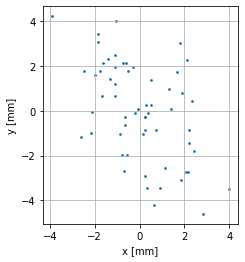

In [47]:
xyref = np.mean(static_point_rdcoords[:,0:2], axis=0)*1000
xy = static_point_rdcoords[:,0:2]*1000 - xyref

fig, ax = plt.subplots()

plt.scatter(xy[:,0], xy[:,1] , s=3)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.grid()

ax.set_aspect('equal')

plt.show();

**Question 5:** Include the scatterplot in your report.

In **Appendix I** we show how to add an error elipse to the scatterplot.

Another useful way to display the scatter is to plot the data as an histogram:

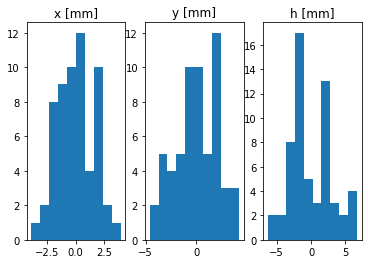

In [48]:
xyzref = np.mean(static_point_rdcoords, axis=0)*1000
xyz = static_point_rdcoords*1000 - xyzref

fig, (ax0, ax1, ax2) = plt.subplots(1,3)

ax0.hist(xyz[:,0])
ax1.hist(xyz[:,1])
ax2.hist(xyz[:,2])
ax0.set_title('x [mm]')
ax1.set_title('y [mm]')
ax2.set_title('h [mm]')

plt.show();

**Question 6:** Include the three position coordinate histograms in your report.

## Analysis of the coordinate accuracy - checking the coordinates

Two existing benchmarks, **C3** and **L7**, for which we know the coordinates accurately from previous measurements campaigns, were measured in order to validate and check the newly derived coordinates.

The given coordinates for the two points are

name | longitude   | latitude    | elevation |  x-RD      |   y-RD      | h-NAP
-----|-------------|-------------|-----------|------------|-------------|--------
C3   | 4.375868389 | 51.99711689 |  43.1350  | 85546.7239 | 445898.3033 | -0.3835
L7   | 4.375871465 | 51.99707539 |  43.1551  | 85546.8709 | 445893.6834 | -0.3633

The longitude, latitude and elevation are in ETRS89 (Dutch national realization based on ETRF2000).

The RD and NAP coordinates have been computed using the official RDNAPTRANS(TM) procedure using PCTrans from the ministry of Defense (https://www.defensie.nl/downloads/applicaties/2021/06/30/pctrans5_20210630). This coordinate transformation is centimeter accurate, as opposed to the one provided by `EPSG:28992`. Later we shall also do a more accurate transformation using `PROJ` in Python.

The given coordinates are stored in two numpy arrays:

In [49]:
refs = [ 'C3' , 'L7']
geo_ref = np.array([[ 4.375868389, 51.99711689, 43.1350 ] ,   
                    [ 4.375871465, 51.99707539, 43.1551 ]])
rd_ref = np.array([[ 85546.7239, 445898.3033, -0.3835 ] ,
                  [ 85546.8709, 445893.6834, -0.3633 ]])
geo_ref

array([[ 4.37586839, 51.99711689, 43.135     ],
       [ 4.37587147, 51.99707539, 43.1551    ]])

#### Difference between measured and reference from geographic coordinates

In the code cells below the difference between the measured and given coordinates are computed using the geographic (geodetic) longitude, latitude and elevation coordinates. 

We start by providing the measured coordinates as numpy array in the same row order as the reference coordinates. Please note that you have to adjust this section to match YOUR dataset!!

In [50]:
# Measured coordinates (order must be the same as the given coordinates: C3 == a1, L7 == a2)
geo_meas = np.array(points_idx[['longitude', 'latitude',  'elevation']].loc[['a1','a2']])
geo_meas

array([[ 4.37586845, 51.99711651, 43.16642   ],
       [ 4.37587156, 51.9970752 , 43.17842   ]])

The differences in longitude (deg), latitude (deg) and elevation (m) are:

In [51]:
geo_diff = geo_meas - geo_ref
geo_diff

array([[ 5.93333338e-08, -3.80000003e-07,  3.14200000e-02],
       [ 9.33333331e-08, -1.85000005e-07,  2.33200000e-02]])

Using eqs. (29.6) and (29.7) from the Surveying and Mapping book (page 266) small differences in latitude and longitude can be converted into units of meters. 

First, we get the parameters for the ellipoid from one of the GeoDataFrames:

In [52]:
crscf = points.crs.to_cf()
a = crscf['semi_major_axis']
finv = crscf['inverse_flattening']
f = 1/finv
e2 = 2*f - f**2

print('a, finv:', a, finv)

a, finv: 6378137.0 298.257223563


Then we compute the scaling factors (deg -> meters) for the latitude and longitude using eqs. (29.6) for the radius of curvature and the conversion factors from (29.7):

In [53]:
lat0 = np.deg2rad(np.mean(geo_ref[:,1]))       # reference latitude in radians

N = a / np.sqrt(1 - e2 * np.sin(lat0)**2)      # radius of curvatures
M = N * (1 -e2) / ( 1 - e2 * np.sin(lat0)**2)
flat= M * np.pi / 180                          # conversion factors deg -> m
flon= N*np.cos(lat0) * np.pi / 180

print('flat, flon:', flat, flon)

flat, flon: 111267.29811810433 68682.45977424421


In this conversion the height above the ellipsoid is ignored, therefore, the resulting metrics are on the ellipsoid. 

The differences in East (longitude direction), North (latitude direction) and elevation, in cm (explaining the factor `100` in the code), are:

In [54]:
geo_diff_metric = geo_diff.copy()
geo_diff_metric[:,0] =  geo_diff[:,0]*flon 
geo_diff_metric[:,1] =  geo_diff[:,1]*flat

print('Difference in East, North and Up in cm:\n', geo_diff_metric *100)

Difference in East, North and Up in cm:
 [[ 0.40751593 -4.22815736  3.142     ]
 [ 0.64103629 -2.05844507  2.332     ]]


**Question 7:** Include these differences in your report and compare these with the standard deviations from the previous section. Explain in your report why these differences are smaller/larger than the standard deviations. Some hints are provided below, what can you say about your case? 

In general these differences should be significantly larger than the standard deviations from the previous section, which represent the internal precision of the GNSS system. There are a couple of factors that contribute to the error budget, that could provide an explanation:

- the pole deviated from the vertical and/or the bubble level has an error
- the length of the pole was entered incorrectly
- the height of the antenna phase center above the antenna reference point is not correct (this can happen for the rover as well as for the reference station), or the software may not apply the antenna height for the reference station correctly (this height should be broadcast by a special RTCM message)
- the coordinates of the reference station are in error
- systematic error in the GNSS (a obvious culprit is the ionosphere delay, if not modelled correctly, this results in a scale error)
- human error (e.g. wrong point)

When the differences are in the few cm range, human errors in occupying the wrong point, or mistakes in entering the antenna height, can be ruled out, though a few cm error in holding the pole vertical is easy to make.

If one of the differences is smaller, or the same order of magnitude, as the standard deviation, then this is just coincidence (can happen statistically). 

#### Difference between measured and reference from projected coordinates

The measured coordinates can be converted to projected RD coordinates using the inbuild CRS transformation, and then compared to the projected RD coordinates that are given.

The RD and NAP coordinates given by *rd_ref* in the previous section have been computed using the official RDNAPTRANS(TM) procedure with PCTrans from the ministry of Defense (https://www.defensie.nl/downloads/applicaties/2021/06/30/pctrans5_20210630). This coordinate transformation is centimeter accurate, as opposed to the one provided by `EPSG:28992`. So, lets compare:

In [55]:
# Measured coordinates (order must be the same as the given coordinates: C3 == a1, L7 == a2) in RD
rd_meas = np.vstack([ np.array(points_idx.to_crs('EPSG:28992').geometry['a1'].coords) ,
                      np.array(points_idx.to_crs('EPSG:28992').geometry['a2'].coords) ])
rd_meas

array([[8.55467266e+04, 4.45898267e+05, 4.31664200e+01],
       [8.55468762e+04, 4.45893669e+05, 4.31784200e+01]])

In [56]:
rd_ref

array([[ 8.55467239e+04,  4.45898303e+05, -3.83500000e-01],
       [ 8.55468709e+04,  4.45893683e+05, -3.63300000e-01]])

In [57]:
rd_diff = rd_meas - rd_ref
print('Difference in East (x) and North (y) in cm (from geographic coordinates):\n', rd_diff[:,0:2] *100)
print('Difference in East (x) and North (y) in cm (from RD coordinates): \n', geo_diff_metric[:,0:2] *100)
print('Difference in East (x) and North (y) in cm between methods: \n', rd_diff[:,0:2] *100 - geo_diff_metric[:,0:2] *100)

Difference in East (x) and North (y) in cm (from geographic coordinates):
 [[ 0.2666124  -3.66171522]
 [ 0.52584704 -1.48749261]]
Difference in East (x) and North (y) in cm (from RD coordinates): 
 [[ 0.40751593 -4.22815736]
 [ 0.64103629 -2.05844507]]
Difference in East (x) and North (y) in cm between methods: 
 [[-0.14090353  0.56644214]
 [-0.11518925  0.57095245]]


These differences are surprisingly small considering that `EPSG:28992` is officially only accurate at the meter level. Could this be just for Delft, or is this true for the whole of the Netherlands? We don't know.

## RDNAPTRANS™2018 - Official Coordinate transformation between RD, NAP and ETRS89

RDNAPTRANS (https://www.nsgi.nl/rdnaptrans) is the name of the official Dutch transformation procedure between RD (Rijksdriehoeksmeting), NAP (Normaal Amsterdams Peil) and ETRS89 (European Terrestrial Reference System 1989). The current version is RDNAPTRANS™2018. RDNAPTRANS is maintained by the Nederlandse Samenwerking Geodetische Infrastructuur (NSGI). 

The following implementations and API are available (https://www.nsgi.nl/web/nsgi/geodetische-infrastructuur/coordinatentransformatie):

- PCTrans: A freely available Windows 10 application for geodetic and hydrographic computations from the Hydrographic Service (https://www.defensie.nl/downloads/applicaties/2021/06/30/pctrans5_20210630)
- Web based API provided by NSGI (https://www.nsgi.nl/coordinatentransformatie-api), API-key required
- Implementations of RDNAPTRANS™2018 by software providers (validated by NSGI)

RDNAPTRANS™2018 can be implemented using the Transform method from the Python-3 `pyproj` package with PROJ version 7.x or higher. Two additional files are required: the geoid file `nlgeo2008.gtx` and transformation grid file `rdcorr2018.gsb` must be present in the same folder as this module.

Reference:

Jochem Lesparre, Lennard Huisman and Bas Alberts (2020), RDNAPTRANS™2018 - Coordinate transformation to and from Stelsel van de Rijksdriehoeksmeting and Normaal Amsterdams 
Peil, Nederlandse Samenwerking Geodetische Infrastructuur, 5 Feb 2020.

RDNAPTRANS™2018 requires the Python-3 `pyproj` package with PROJ version 7.x or higher. Before continuing, check if you are using PROJ version 7.x or higher:

In [58]:
pyproj.show_versions()

pyproj info:
    pyproj: 3.4.1
      PROJ: 9.1.0
  data dir: /usr/local/lib/python3.8/dist-packages/pyproj/proj_dir/share/proj
user_data_dir: /root/.local/share/proj
PROJ DATA (recommended version): 1.11
PROJ Database: 1.2
EPSG Database: v10.074 [2022-08-01]
ESRI Database: ArcGIS Pro 3.0 [2022-07-09]
IGNF Database: 3.1.0 [2019-05-24]

System:
    python: 3.8.10 (default, Nov 14 2022, 12:59:47)  [GCC 9.4.0]
executable: /usr/bin/python3
   machine: Linux-5.10.147+-x86_64-with-glibc2.29

Python deps:
   certifi: 2022.12.7
    Cython: 0.29.33
setuptools: 57.4.0
       pip: 22.0.4


RDNAPTRANS™2018 is implemented using the `pyproj` Transform method. A `pyproj.Transformer` object `rdnaptrans2018` is created with the transformation parameters given by the variable  `pipeline_3d`. The transformer object is used to create the functions `etrs89_to_rdnap(lat, lon, elevation) -> x, y, H` and the inverse transformation `rdnap_to_etrs89(x, y, H) -> lat, lon, elevation`:

In [59]:
# Define variables with the PROJ transform pipeline and pyproj.Transformer object

pipeline_3d = (
    '+proj=pipeline '
    '+step +proj=unitconvert +xy_in=deg +z_in=m +xy_out=rad +z_out=m '
    '+step +proj=axisswap +order=2,1,3,4 '
    '+step +proj=vgridshift +grids=./nlgeo2018.gtx '
    '+step +proj=push +v_3 '
    '+step +proj=set +v_3=43 +omit_inv '
    '+step +proj=cart +ellps=GRS80 '
    '+step +proj=helmert +x=-565.7346 +y=-50.4058 +z=-465.2895 +rx=-0.395023 '
    '+ry=0.330776 +rz=-1.876073 +s=-4.07242 +convention=coordinate_frame +exact '
    '+step +proj=cart +inv +ellps=bessel '
    '+step +proj=hgridshift +inv +grids=./rdcorr2018.gsb,null '
    '+step +proj=sterea +lat_0=52.156160556 +lon_0=5.387638889 +k=0.9999079 '
    '+x_0=155000 +y_0=463000 +ellps=bessel '
    '+step +proj=set +v_3=0 +omit_fwd '
    '+step +proj=pop +v_3'
)

rdnaptrans2018 = pyproj.Transformer.from_pipeline(pipeline_3d)

# Define function with forward transformation

def etrs89_to_rdnap(lon, lat, elevation):
    # x, y, H = etrs89_to_rdnap(lon, lat, elevation)
    return rdnaptrans2018.transform(lat, lon, elevation, direction='FORWARD')

# Define function with inverse transformation

def rdnap_to_etrs89(x, y, H):
    # lon, lat, elevation = rdnap_to_etrs89_3d(x, y, H):
    lat, lon, elevation = rdnaptrans2018.transform(x, y, H, direction='INVERSE')
    return lon, lat, elevation


Note that the `pipeline_3d` variable contains references to the geoid file `nlgeo2008.gtx` (line 4) and transformation grid file `rdcorr2018.gsb` (line 11), which are expected to be present in the same folder as this notebook. If these files are stored in a different location, you have to adjust the path in the `pipeline_3d` variable. If these files are not present in the expected location the `Transformer` object returns an error!

#### Comparison with official RD/NAP coordinates

For the two control points **C3** and **L7** we have both geographic coordinates and elevation in ETRS89 and RD/NAP coordinates. The RD/NAP coordinates for the control points were computed using Leica captivate and agree with PCTRANS.

Now, let's check if our procedure gives the same result: 

In [60]:
refs = [ 'C3' , 'L7']
geo_ref = np.array([[ 4.375868389, 51.99711689, 43.1350 ] ,   
                    [ 4.375871465, 51.99707539, 43.1551 ]])
rd_ref = np.array([[ 85546.7239, 445898.3033, -0.3835 ] ,
                  [ 85546.8709, 445893.6834, -0.3633 ]])

In [61]:
rd_new = etrs89_to_rdnap( geo_ref[:,0], geo_ref[:,1], geo_ref[:,2]) 
rd_new

(array([85546.72397309, 85546.87093274]),
 array([445898.30371615, 445893.68390911]),
 array([-0.3836091 , -0.36355064]))

Reformat rd_new, and compute the difference:

In [62]:
rd_new = np.array(rd_new).T

In [63]:
print('difference (in mm):\n', (rd_new - rd_ref)*1000)

difference (in mm):
 [[ 0.07308627  0.4161495  -0.10909671]
 [ 0.03273944  0.50911354 -0.25063825]]


You should get differences that are smaller than one millimeter. Check!

Now lets check the inverse transformation:

In [64]:
lon, lat, h = rdnap_to_etrs89( rd_ref[:,0], rd_ref[:,1], rd_ref[:,2]) 
geo_new = np.array([lon, lat, h]).T
print('difference (in mdeg/mdeg/mm):\n', (geo_new - geo_ref)*1000)

difference (in mdeg/mdeg/mm):
 [[-9.89148319e-07 -3.66900821e-06  1.09100387e-01]
 [-3.82891052e-07 -4.49944082e-06  2.50642763e-01]]


A *mdeg* is one milli degree (1/1000 of a degree). 

#### Comparison with EPSG:28922

Earlier, with GeoPandas, we used the transformation from EPSG:4326 to EPSG:28992 which didn't implement the correction grid, and only worked on the horizontal component. Let's compute the difference with the official procedure we just implemented. For the old procedure a new transformer is defined:

In [65]:
EPSG28992 = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:28992")

rd_EPSG28992 = EPSG28992.transform(geo_ref[:,1], geo_ref[:,0])   # the transformer expect latitude before longitude
rd_EPSG28992 = np.array(rd_EPSG28992).T
print(rd_EPSG28992)
print('Difference in mm:\n',(rd_EPSG28992 - rd_ref[:,0:2])*1000)

[[ 85546.72304207 445898.30966605]
 [ 85546.86999753 445893.6898472 ]]
Difference in mm:
 [[-0.85792673  6.36604999]
 [-0.90247346  6.44719566]]


As we remarked before the difference in the horizontal component in the region of Delft is very small. However, differences can increase up to 1-2 dm in other parts of the Netherlands! In **Appendix II** we plot, as an extra, a map of the differences over the Netherlands, and a map with the elevation of the NAP reference surface above the ellipsoid.

At this moment, a more important reason for us to use the RDNAPTRANS procedure, is that it allows us to also convert elevation above the ellipsoid to NAP height, which we need for the production of a Digital Elevation Model (DEM).

## Computing a Digital Elevation Model (DEM)

During the practical you measured a grid from which you will compute a Digital Elevation Model (DEM). 

The data was stored in your dataset as a track. In our dataset this was the second track, but this may be different in yours!. Extract this track as a numpy array and convert into RDNAP:

In [66]:
dem_data_geo = np.array(tracks.geometry[1].coords)
print('shape',dem_data_geo.shape)

shape (193, 3)


In [67]:
xRD, yRD, HNAP = etrs89_to_rdnap(dem_data_geo[:,0], dem_data_geo[:,1], dem_data_geo[:,2] )

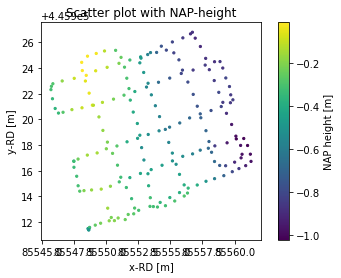

In [68]:
fig, ax = plt.subplots()

plt.scatter(xRD, yRD ,c=HNAP, s=5)
plt.xlabel('x-RD [m]')
plt.ylabel('y-RD [m]')
plt.title('Scatter plot with NAP-height')
plt.colorbar(label='NAP height [m]')

ax.set_aspect('equal')

plt.show();

In [69]:
from matplotlib.tri import Triangulation, LinearTriInterpolator

In [70]:
npts=100

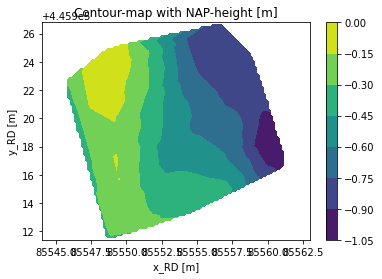

In [71]:
triObj = Triangulation(xRD,yRD)      # measured locations form an irregular grid they serve as vertices (nodes) of triangular interpolation
                                        # see section 7.2 in Primer on Mathematical Geodesy
fz = LinearTriInterpolator(triObj,HNAP) # linear interpolation (of terrain height) within triangles

min_x = np.amin(xRD)                 # determine the boundaries of the (horizontal) area of interest
max_x = np.amax(xRD)
min_y = np.amin(yRD)
max_y = np.amax(yRD)

xnew = np.linspace(min_x,max_x,npts) # set-up new, regular grid
ynew = np.linspace(min_y,max_y,npts)
xxnew, yynew = np.meshgrid(xnew, ynew) # meshgrid to turn new 1D arrays into grid-array coordinates

znew = fz(xxnew,yynew)               # do actual interpolation to new, regular grid

fig = plt.figure()
cs = plt.contourf(xnew, ynew, znew)  # produce contour-map
cb = plt.colorbar(cs)                # add color-bar for height
plt.title('Contour-map with NAP-height [m]')
plt.xlabel('x_RD [m]')
plt.ylabel('y_RD [m]')
plt.axis('equal')

plt.show()

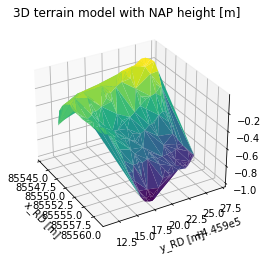

In [72]:
ax = plt.figure().add_subplot(projection='3d')
colormap = 'viridis'
surf = ax.plot_trisurf(xRD, yRD, HNAP, cmap=colormap, antialiased = True)
ax.view_init(30,330)             # set viewing angle - default (elevation=30deg, azimuth=300deg), i.e. looking from South-East
plt.title('3D terrain model with NAP height [m]')
plt.xlabel('x_RD [m]')
plt.ylabel('y_RD [m]')

plt.show();

**Question 8:** Include the contour map and the 3D DEM in your report.

## Appendix I - Plotting confidence ellipses

With a small helper function (from https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html), a 95% reliability standard error ellips can be added to the plot:

In [73]:
# Helper function to plot standard ellipses. Source: https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

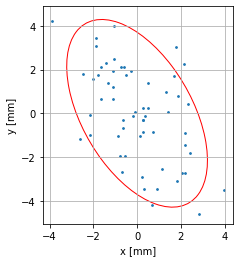

In [74]:
fig, ax = plt.subplots()

ax.scatter(xy[:,0], xy[:,1], s=3)
confidence_ellipse(xy[:,0], xy[:,1], ax, n_std=2, edgecolor='red')
ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
plt.grid()

ax.set_aspect('equal')

plt.show(); 

## Appendix II - RDNAPTRANS versus EPSG:28922

In this appendix two maps of the Benelux area are created showing the differences between EPSG:28922 and the official RDNAPTRANS, and the elevation of the NAP reference surface above the ellipoid.

As a first step a *geopackage* is loaded with the coastlines and borders, which will be used as background.

In [75]:
benelux= geopandas.read_file('Benelux.gpkg')
minx, miny, maxx, maxy = benelux.geometry.total_bounds
print(benelux.crs, minx, maxx, miny, maxy)

EPSG:4326 2.5212895409595575 8.371628267568887 49.27390824151914 53.759861


The next step is to create a grid with longitude and latitude values:

In [76]:
lats = np.arange(49.3, 54, .1)
lons = np.arange(2.6, 8.6, .1)

latgrid, longrid = np.meshgrid(lats, lons)

With the help of this grid, two sets of RD coordinates are computed: one using EPSG:28922 and the other using the official RDNAPTRANS procedure. The RD coordinate differences are plotted as vectors, color coded with the length of each vector: 

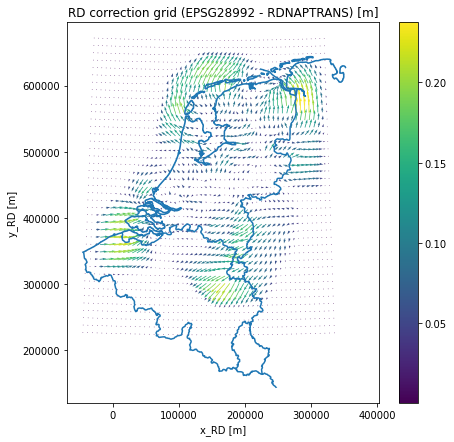

In [77]:
x_EPSG28992, y_EPSG28992 = EPSG28992.transform(latgrid, longrid)   # the transformer expect latitude before longitude
x_rdnaptrans, y_rdnaptrans, h_rdnaptrans = etrs89_to_rdnap(longrid, latgrid, 44*np.ones(np.shape(longrid)))

m = np.sqrt(np.power(x_EPSG28992-x_rdnaptrans, 2) + np.power(y_EPSG28992-y_rdnaptrans, 2))

fig, ax = plt.subplots(figsize=(7,7))
plt.quiver(x_EPSG28992, y_EPSG28992, x_EPSG28992-x_rdnaptrans, y_EPSG28992-y_rdnaptrans , m)
plt.colorbar()
benelux.to_crs("EPSG:28992").plot(ax=ax)
plt.title('RD correction grid (EPSG28992 - RDNAPTRANS) [m]')
plt.xlabel('x_RD [m]')
plt.ylabel('y_RD [m]')
plt.axis('equal')
plt.show()

For the same grid (but now in RD coordinates) the elevation of the NAP reference surface (with NAP height == 0) above the ellipsoid is computed:

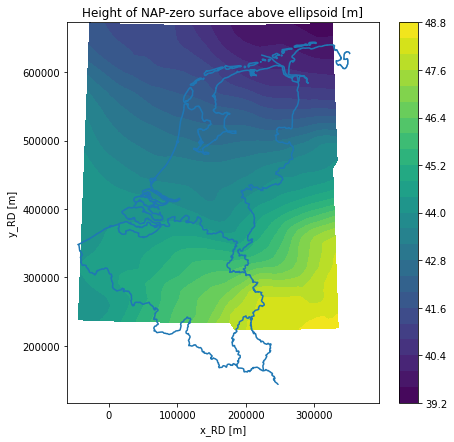

In [78]:
dummy1, dummy2, h_rdnaptrans = rdnap_to_etrs89(x_EPSG28992, y_EPSG28992, np.zeros(np.shape(x_EPSG28992)))

fig, ax = plt.subplots(figsize=(7,7))
cs = plt.contourf(x_EPSG28992, y_EPSG28992, h_rdnaptrans, 30)  # produce contour-map
cb = plt.colorbar(cs)                # add color-bar for height
benelux.to_crs("EPSG:28992").plot(ax=ax)
plt.title('Height of NAP-zero surface above ellipsoid [m]')
plt.xlabel('x_RD [m]')
plt.ylabel('y_RD [m]')
plt.axis('equal')
plt.show()

The NAP height and elevation above the ellipsoid differ by about 40 - 48 meters.

[End of Jupyter notebook]